# Entendendo a sazonalidade 

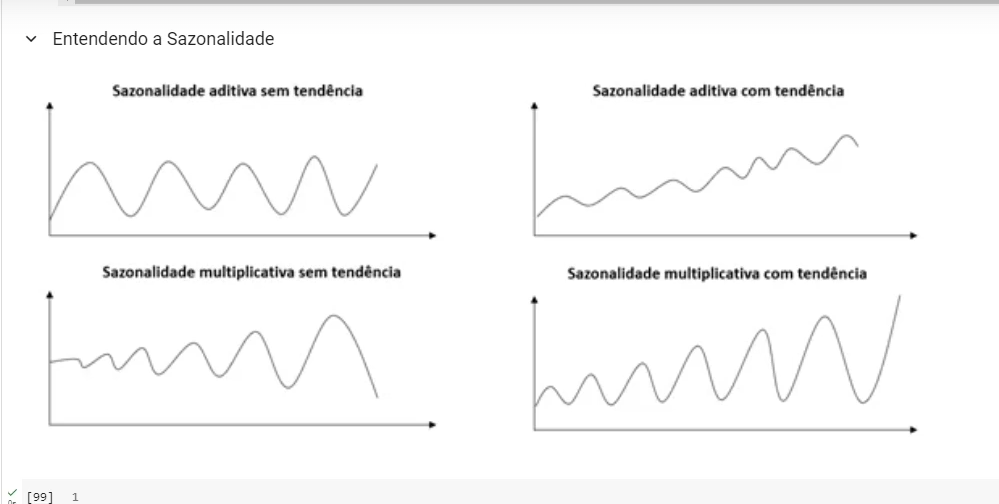

A sazonalidade é uma caractersística específica das séries temporais que as diferencia de outros tipos de dados. 

A sazonalidade é basicamente a representação de algum ritmo ou comportamento, seja da natureza ou da atividade humana, que se expressa através de ciclos. 

Então nós representamos em séries temporais esses ciclones em formas de sazonalidade. 

Nesse capítulo, nós vamos entender como que o Prophet interpreta a sazonalidade por padrão. 

Como odemos ajustá-las ou mesmo adicionar novas sazonalidades. 

Um primeiro aspecto que nós temos que entender sobre sazonalidade seria o seu tipo.

Nós temos a sazonalidade aditiva e a sazonalidade multiplicativa. 

+ Na aditiva no decorrer da série não altera a sua amplitude, ou seja tem uma amplitude fixa com relação ao dado. 

+ Já na multiplicativa, há umaumento ou uma mudança de amplitude ao decorrer da série. 

# faremos testes com os dados, mudando a sazonalidades. 

In [1]:
import pandas as pd
df_air_passengers = pd.read_csv('../Modulo4/AirPassengers.csv')
display(df_air_passengers)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [2]:
df_air_passengers['Month'] = pd.to_datetime(df_air_passengers['Month'])
df_air_passengers.columns =['ds','y']
df_air_passengers

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


# Aditivos

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
19:09:54 - cmdstanpy - INFO - Chain [1] start processing
19:09:54 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will r

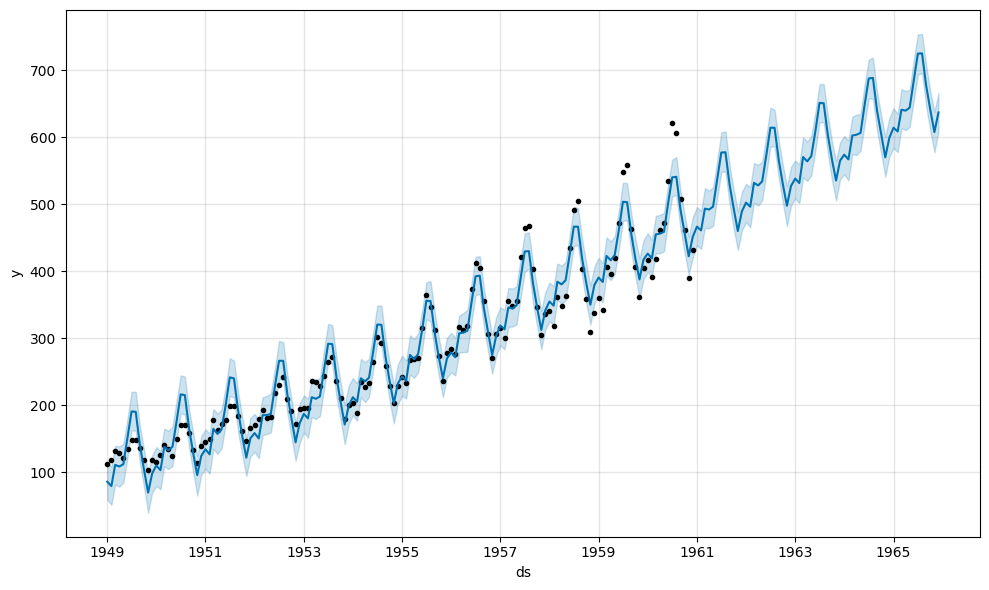

In [3]:
#importar a biblioteca
from prophet import Prophet
#instanciado o modelo
model_a = Prophet(seasonality_mode ='additive') # Por padrão os dados já são aditivos
model_a.fit(df_air_passengers)
future = model_a.make_future_dataframe(periods = 12 * 5, freq= 'MS')
forecast = model_a.predict(future)
# Visualizar o Forecast
import matplotlib.pyplot as plt
fig = model_a.plot(forecast)
plt.show() 

### o prophet não conseguiu acompanhar o aumento da amplitude dos dados. No final, a previsão ficou com uma amplitude menor do que o dado deveria ter. E isso permance para o período projetado à frente. Então esse é um exemplo claro de uma sérrie qu tem que ser modelada com a sazonalidade no modo multiplicativo. Por que a amplitude dos dados vai se alterando no decorrer da série. 

# multiplicativos 

19:09:54 - cmdstanpy - INFO - Chain [1] start processing
19:09:54 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


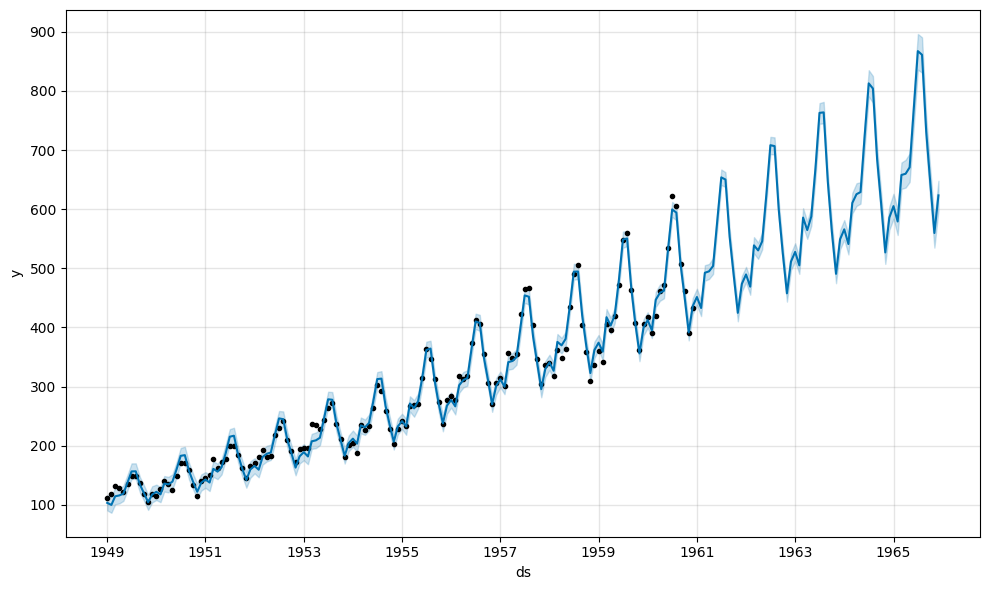

In [4]:
#importar a biblioteca
from prophet import Prophet
#instânciado o modelo
model_m = Prophet(seasonality_mode ='multiplicative')
model_m.fit(df_air_passengers)
future = model_m.make_future_dataframe(periods = 12 * 5, freq= 'MS')
forecast = model_m.predict(future)
# Visualizar o Forecast
import matplotlib.pyplot as plt
fig = model_m.plot(forecast)
plt.show() 

quando olhamos a série modelada com a sazonaçidade multiplicativa, nós vemos que o prophet ele conseguiu se ajustar ao crescimento da variação dos dados ao longo da série. Nós vemos uma previsão mais coerente algo que se estende até para o período que não temos dados de treinamento. 

diferença dos multiplicativos e aditivos. 

# componentes aditivos 

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

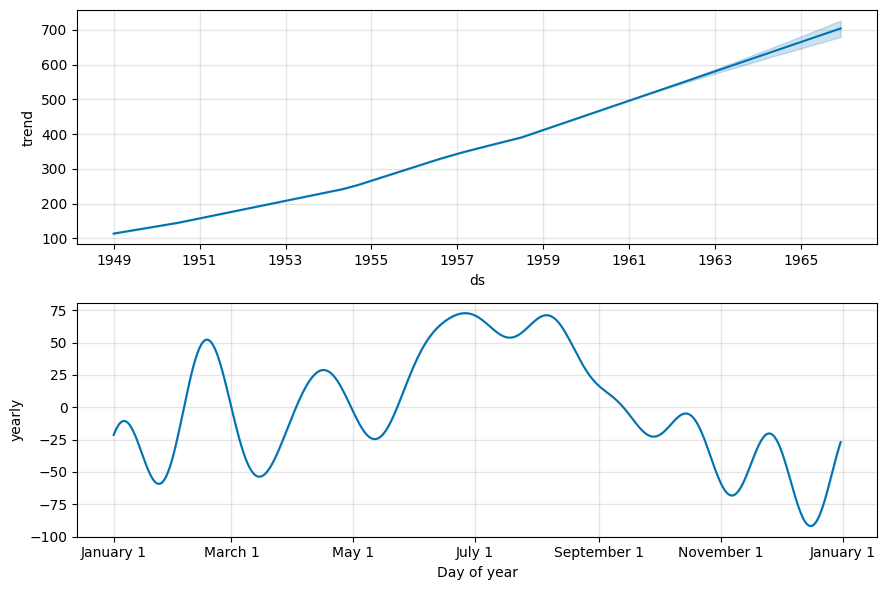

In [5]:
fig2 = model_a.plot_components(forecast)
fig2.show()

# componentes multiplicativos

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

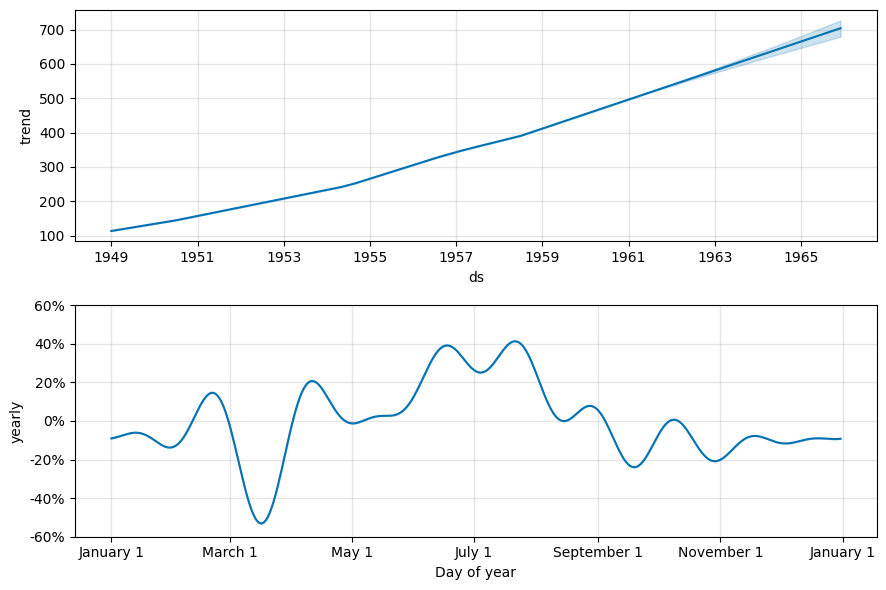

In [6]:
fig2 = model_m.plot_components(forecast)
fig2.show()

Os gráficos acima de sazonalidade e tendência estão parecidos, mas quando trabalhamos em uma sazonalidade aditiva, os valores são tratados de forma absoluta aqui na sazonalidade. Na parte anula, tem alguns valores fixos que são acrescentados à nossa tendência de forma fixa. Isse reflete em um aspecto que pode gerar problema em algumas séries temporais, que é, no caso dela, prevê valores negativos, quando isso não seria possível. 

Imagine se essa tenência aqui fosse uma tendência de queda, como a nossa sazonalidade estaria com um valor fixo, o que aconteceria. Conforme a tendência fosse caindo, conforme a tendência se aproximasse de zero, ele adicionaria esse valor absoluto à tenência e possivelmente a gente teria valores negativos na tendência. Sendo que isso NÃO seria possível observando no mundo real. 


Quando olhamos para a sazonalidade multiplicativa, nós vemos que há um valor relativo, ou seja, a sazonalidade sempre vai ser relativa ao valor que temos presente na tendência. Então se a tendência está aumentando, a amplitude da nossa sazonalidade vai aumentar de forma relativa à nossa tendência, de forma que se nós tivéssemos uma tendência de queda, comentado no cenário anterior, de possíveis valores negativos, isso já não aconteceria na série multiplicativa. 

Por que, conforme a nossa tendência fosse se aproximando de zero, a amplitude também iria reduzindo de forma que ela nunca efetivamente ficaria negativa. 

# Desafiador para ver se será utilizado o modelo aditivo ou multiplicativo. 

Se você se atentar cuidadosamente aos padrões das séries e observar se ela tem um movimento de mudança na variação ao longo da série ou se é um padrão mais fixo, isso vai te ajudar a determinar de uma forma mais segura. 

# Entendendo Fourier Order e Controlando a Sazonalidade. 

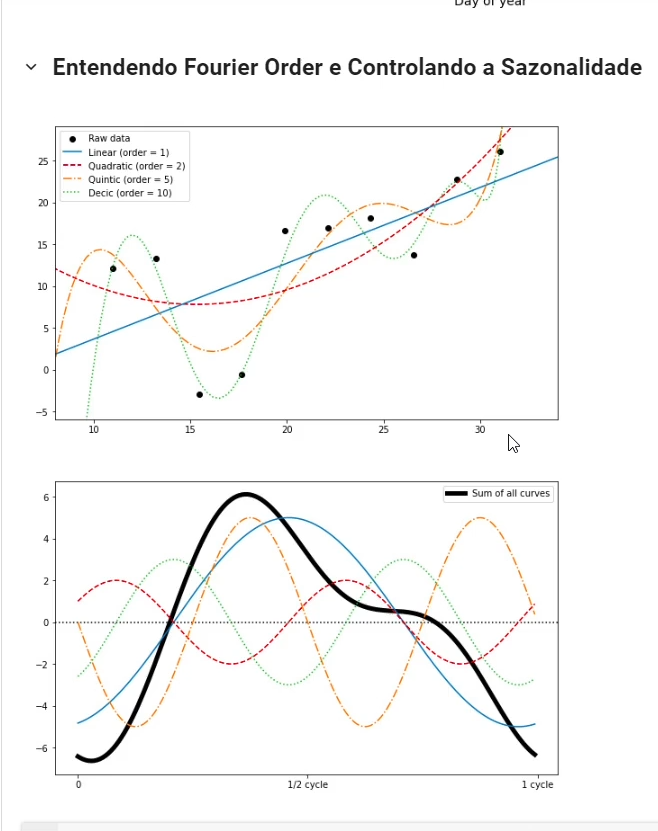


Como a sazonalidade é construída. 

A sazonalidade é o coração de como o Prophet funciona e a sazonalidade é modelada no prophet utilizando as Séries de Fourier ou Fourier Series. 


A melhor forma de exemplificar é compararmos com uma regressão linear. 


##### A melhor forma de exemplificar é compararmos com uma regressão linear. Na imagem, da figura 1, temos o exemplo, se aumentarmos a ordem na equação , ou seja, o seu expoente, nós podemos obter um mlçehor ajuste aos dados. Se tivermos uma regressão linear de ordem 1, nós vemos que ele consegue apenas desenhar uma linha reta nos daos, o que promove um certo erro com relação aos dados reais.

Conforme nós aumentamos a ordem dessa equação, ela consegue fazer curvas que se aproximam mais dos dados reais, ou seja, reduzindo o seu erro. E conforme aumentamos progressivamente essa linha, ela vai se ajustando aos dados. Até o erro estar bem próximo de zero (0).

 

De forma prática, a série de Fourier é uma soma de ondas senoidais e <b>a ordem de Fourier é um número de ondas senoidais, que estão sendo usadas para modelar a sazonalidade em um conjunto de dados.</b> 

Então, de forma simplificada, <b>quanto maior for o número da ordem de Fourier para sazonalidade, mais nós vamos ter uma sazonalidade sinuosa, fazendo várias curvas e se ajustando muito ao dado que está sendo utilizado no treinamento</b>, e quanto menor, mais plana vai ser essa linha da sazonalidade.  


Esse é um ponto que sempre devemos buscar equilíbrio, pois se nós deixamos a ordem Fourier muito baixa, como a quadrática, o modelo não vai conseguir capturar os detalhes suficientes dos dados. E se deixarmos <b>a ordem de fourier muito grande, nós podemos capturar detalhes desnecessários dos dados</b>.

### Nós podemos capturar os ruídos que estão presentes ali naquela base, então isso pode levar a um modelo que se adapta muito bem aos dados de treinamento, mas ele não consegue generalizar bem com dados novos. Isso é o que chamamos de overfitting 

Overfitting
Um cenário de overfitting ocorre quando, nos dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste o resultado é ruim.

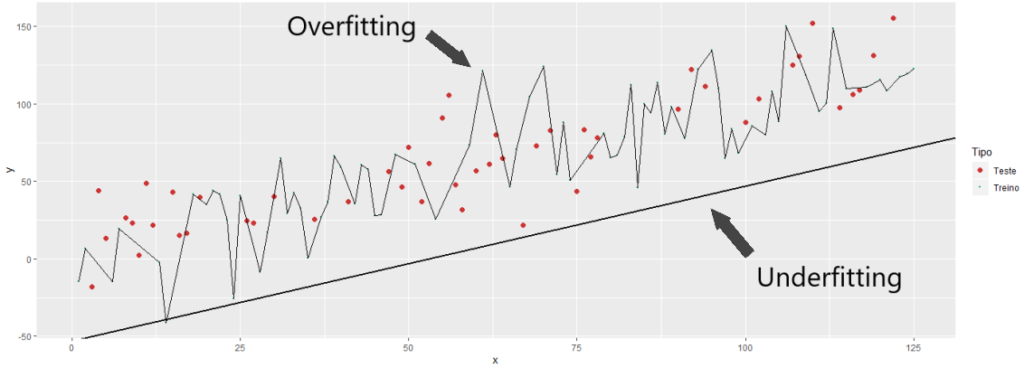

Underfitting
Neste cenário o desempenho do modelo já é ruim no próprio treinamento. O modelo não consegue encontrar relações entre as variáveis e o teste nem precisa acontecer. Este modelo já pode ser descartado, pois não terá utilidade.

## O prophet ajusta a sazonalidade anual com uma ordem de 10, a sazonalidade semanal com uma ordem de 3 e a diária com ordem 4. Ordem da Série de Fourier.


Geralmente esses padrões funcionam bem e nenhum ajuste é necessário, mas às vezes é necessário nós darmos um auxílio para ele fazendo um ajuste manual, um cenário que será muito importante interpretar é qual série e fourier colocar. Isso acontece quando nós estamos incluindo uma sazonalidade manualmente, pois como ela é manual, nós vamos ter que determinar o quão sinuosa ela é. 

In [7]:
import pandas as pd

df_divvy_bikes = pd.read_csv('divvy_daily.csv')
display(df_divvy_bikes)

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow
...,...,...,...,...
1453,12/27/2017,1117,2.458013,cloudy
1454,12/28/2017,1267,10.802762,rain or snow
1455,12/29/2017,1049,12.978932,cloudy
1456,12/30/2017,519,3.657033,cloudy


In [8]:
df = df_divvy_bikes[['date', 'rides']]

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds','y']
df.head()

/tmp/ipykernel_34241/613697276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,ds,y
0,2014-01-01,95
1,2014-01-02,111
2,2014-01-03,6
3,2014-01-04,181
4,2014-01-05,32


In [10]:
model = Prophet(seasonality_mode = 'multiplicative')
model.fit(df)

19:09:55 - cmdstanpy - INFO - Chain [1] start processing
19:09:55 - cmdstanpy - INFO - Chain [1] done processing


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


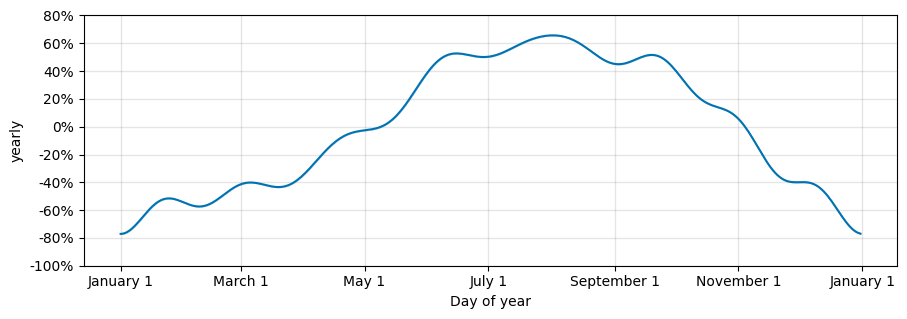

In [11]:
from prophet.plot import plot_yearly

fig3 = plot_yearly(model, figsize=(10.5, 3.25))


plt.show()


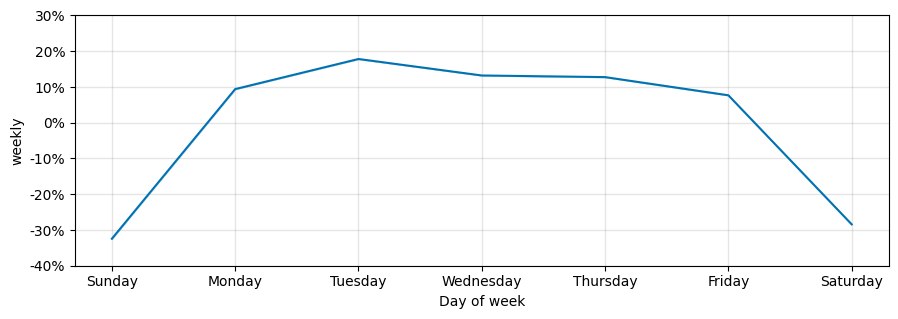

In [12]:
from prophet.plot import plot_weekly

fig3 = plot_weekly(model, figsize=(10.5, 3.25))


plt.show()


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


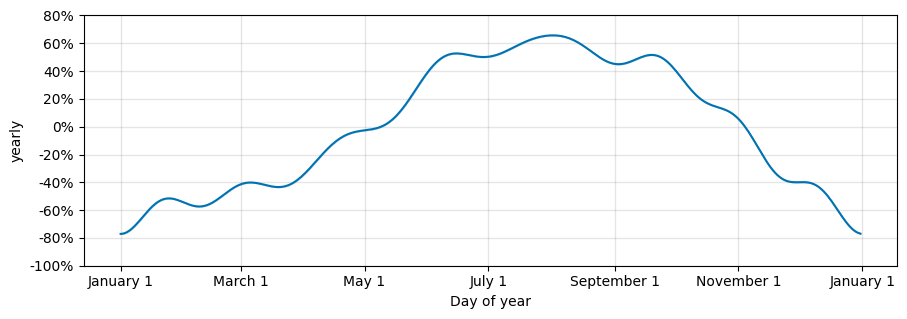

In [13]:
from prophet.plot import plot_yearly

fig3 = plot_yearly(model, figsize=(10.5, 3.25))


plt.show()

 plotagem a sazonalidade anual, e vemos que a sazonalidade tem uma grande sinuosidade, especialmente durante a variação do mês. Então nesse exemplo, nós vamos buscar que essa sazonalidade ela fique menos sinuosa, que ela perca esses ruídos ('ondinhas') referentes a sazonalidade mensal. 

In [14]:
# Vamos ajustar no modelo a variável yearly_seasonality = 4, indicando uma ordem de Fourier 4 para o ano, sendo que no prophet tem o padrão 10. 

In [15]:
# Reajustar a sazonalidade anual da ordem de fourier

model = Prophet(seasonality_mode = 'multiplicative', yearly_seasonality = 4)
model.fit(df)

19:09:55 - cmdstanpy - INFO - Chain [1] start processing
19:09:55 - cmdstanpy - INFO - Chain [1] done processing


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


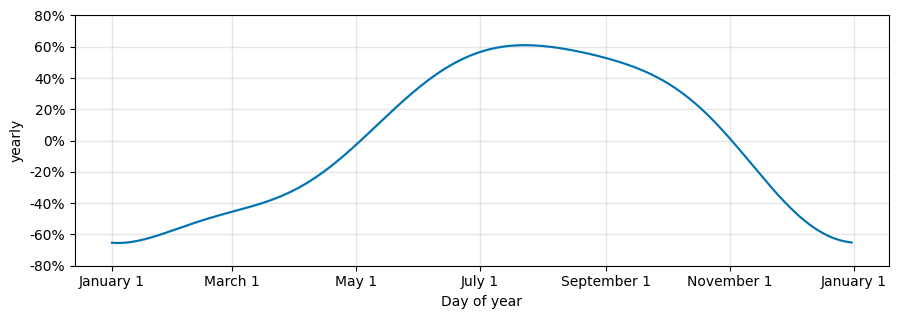

In [16]:
from prophet.plot import plot_yearly

fig3 = plot_yearly(model, figsize=(10.5, 3.25))


plt.show()

Isso é para entender como isso está melhorando ou amenisando a performance dele ou não. 

Para alterarmos as outras sazonalidades, basta usarmos os métodos correspondentes a cada uma 
weeky_seasonality
daily_seasonality


In [17]:
# Reajustar a sazonalidade anual da ordem de fourier
# no caso os dados do df não tem dados semanais weeky_seasonality = 2, 
model = Prophet(seasonality_mode = 'multiplicative', yearly_seasonality = 4, daily_seasonality=5)
model.fit(df)

19:09:55 - cmdstanpy - INFO - Chain [1] start processing
19:09:55 - cmdstanpy - INFO - Chain [1] done processing


Para ajusta como la ficará mais ou menos sensíveis aos nossos dados. 

In [18]:
# aula 18

# sazonalidades Personalizadas 


As únicas sazonalidades comas quais trabalhamos foram as dos padrões do Prophet, a anual, semanal e diária. Mas, não há razão para nós nos limitarmos a essas sazonalidades. Se os seus dados contiverem um ciclo maior ou menor que o ciclo anual, de 365,25 dias ou o semanal de sete dias, ou o diário de um dia.  

#### O prophet dá a possibilidade de fazer essa sazonalidade por conta própria. 

Vamos monitorar as manchas solares. 

In [19]:
df = pd.read_csv('sunspots.csv')
df.head(3)

,Date,Monthly Mean Total Sunspot Number,"Source: WDC-SILSO, Royal Observatory of Belgium, Brussels"
0,1749-01-31,96.7,NaN
1,1749-02-28,104.3,NaN
2,1749-03-31,116.7,NaN


In [20]:

df = pd.read_csv('sunspots.csv',\
                 usecols = ['Date', 'Monthly Mean Total Sunspot Number'])

In [21]:


df['Date'] = pd.to_datetime(df['Date'] , format='mixed')
df.columns = ['ds', 'y']
df.head()


,ds,y
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


### Esse estudo foi iniciado por Galileu Galilei no século XV e veio sistematicamente sendo registrado. Esse é maior registro de um fenômeno natural. E essas observações identificam o ciclo de cerca de 11 anos para um pico de manchas solares. 

vamos cirar uma szonalidade com essa especificidade 

# O primeiro passo é desativar a sazonalidade anual. 

In [27]:
#model = Prophet(seasonality_mode = 'multiplicative', yearly_seasonality= 'False')
model = Prophet(seasonality_mode = 'multiplicative', yearly_seasonality= False)


In [28]:
model

# Uma vez instanciado o nosso modelo, nós vamos adicionar agora efetivamente a nossa sazonalidade personalizada. 


assim, chama-se o modelo que nós instaciamos, chamar o método dele e de sazonalidade, 

passamos o nome da sazonalidade,  o período=> tamanho dela, e a ordem do fourier (quão sinusiosa ela vai ser). 

In [29]:
model.add_seasonality(name ='11-year cicle', period=11*365.25, fourier_order =5)

In [30]:
model.fit(df)

19:11:53 - cmdstanpy - INFO - Chain [1] start processing
19:11:53 - cmdstanpy - INFO - Chain [1] done processing


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/fabiene/anaco

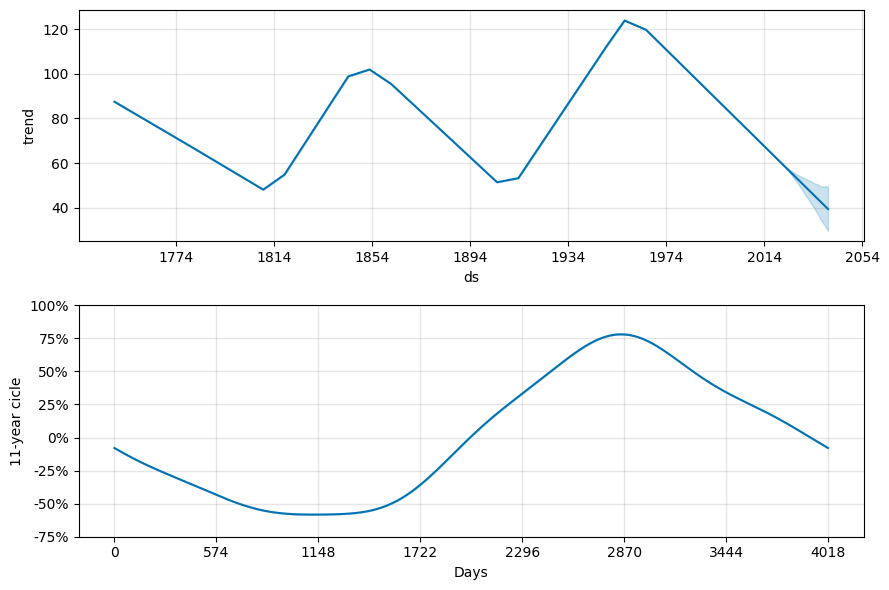

In [31]:
# a base dos dados é mensal,e vamos prever 240 meses
future = model.make_future_dataframe(periods=240, freq='M') # M indica que a frequência é mensal
forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()


# no gráfico acima indica o ciclo solad de 11 anos, e no eixo x estão os dias

No tique abaixo no gráfico dos 11 anos de ciclo é basicamente um ano e meio do tique anterior. Já o ciclo completo é de fato de 11 anos. No ponto mais baixo desse ciclo, nós temos cerca de 60% menos manchas solares que a média. 


Já no ponto mais alto dessa sazonalidde, nós temos um pico de cerca de 75% a mais de manchas solares do que a média. 

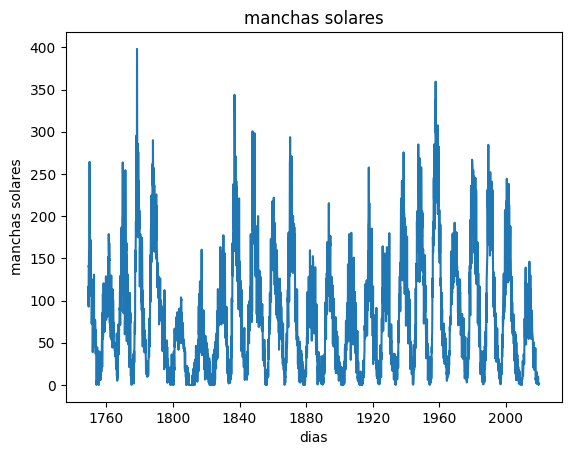

In [33]:
import matplotlib.pyplot as plt

# Dados de exemplo
x = df['ds']
y = df['y']


plt.plot(x, y)

plt.title('manchas solares')
plt.xlabel('dias')
plt.ylabel('manchas solares')

# Mostrar o gráfico
plt.show()

# Nova forma de você inspecionar as sazonalidade que estão presentes no seu modelo

In [34]:
model.seasonalities

OrderedDict([('11-year cicle',
              {'period': 4017.75,
               'fourier_order': 5,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

# o perído é sempre especificado em dias

quando determinados a nossa sazonalidade, nós temos sempre que passar um valor em dias. 

model.add_seasonality(name ='11-year cicle', period=11*365.25, fourier_order =5)

se ao invés da sazonalidade anual a sazonalidade fosse diária, nos teriamos que passar a dividir o 1 por 24 horas, que daria uma fração de dias. Mas que representaria ali a hora, que é o período que nós queremos modelar para especificar. 

Para especificar uma sazonalidade trimestral, pegariamos os 265,25 dividido por 4, que daria os trimestres e assim por diante. Sempre é um valor relativo à dias

### Assim, entendemos como adicionar a sazonalidades personalizadas no prophet 